<a href="https://colab.research.google.com/github/sujithrc/Audio_capturing_using_DL_Technique/blob/main/voice_capturing_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

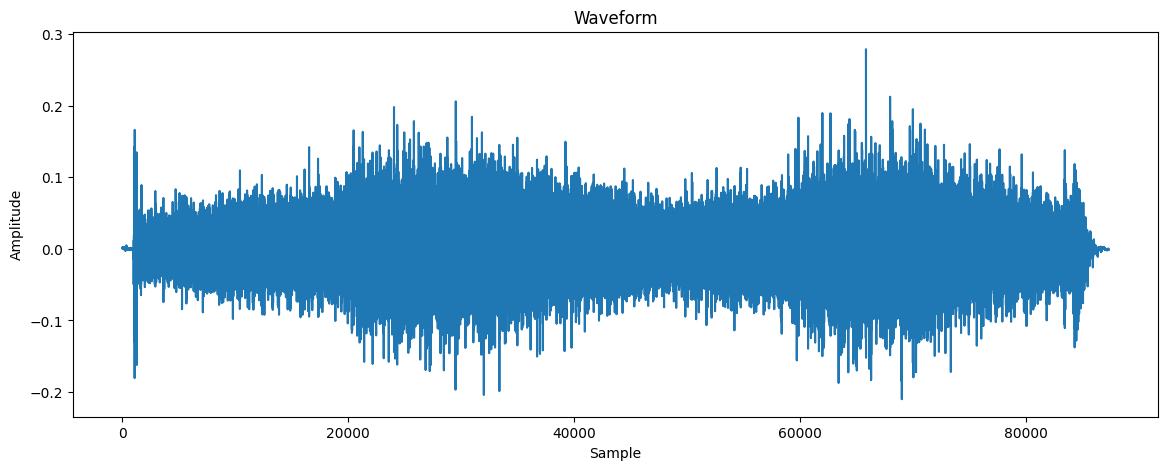

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
filename = '/content/drive/MyDrive/UrbanSound8K/71087-4-0-0.wav'
data, sample_rate = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
!pip install --upgrade librosa

In [ ]:
sample_rate

22050

In [ ]:
# using scipy library
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/71087-4-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.00100303  0.00151678  0.00159746 ... -0.00112563 -0.00135918
 -0.00081729]


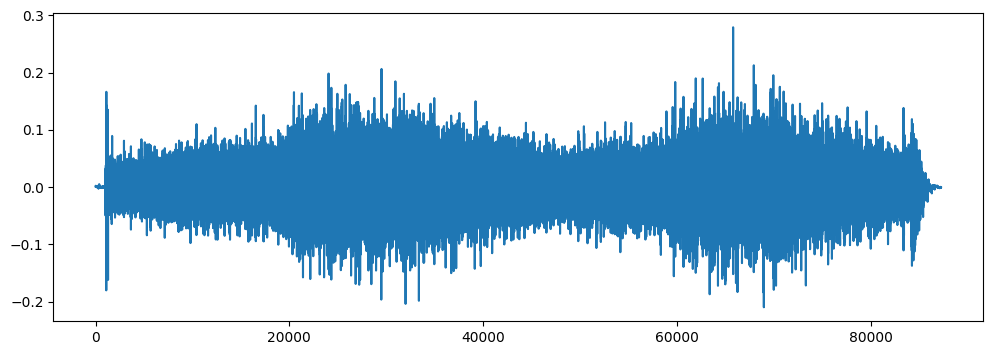

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Extract Features
Here we will be using "Mel-Frequency Cepstral Coefficients(MFCC)" from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.**bold text**

In [ ]:
# Using MFCC we can extract the information from the audio
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 171)


In [ ]:
# for single audio
mfccs

array([[-5.6241614e+02, -2.6849207e+02, -1.5615071e+02, ...,
        -3.4763977e+02, -4.5600809e+02, -5.4548517e+02],
       [ 9.9095230e+01,  2.6342060e+01,  2.5588642e+01, ...,
         6.2372597e+01,  5.0358078e+01,  5.6150112e+01],
       [ 4.7655034e+00, -1.9445827e+01, -2.5225582e+01, ...,
         4.2917152e+01,  3.0153366e+01,  2.2766491e+01],
       ...,
       [ 1.9939511e+00,  1.2913597e+00,  3.3738032e-02, ...,
         4.0326185e+00,  1.7911150e+00,  1.8948475e+00],
       [-3.9942086e+00, -3.5146105e+00, -2.8617935e+00, ...,
        -3.5350668e+00, -4.2070775e+00, -1.2679925e+00],
       [ 3.2201731e-01,  3.9971223e+00,  4.2496252e+00, ...,
        -3.5873312e-01,  4.1965861e+00,  7.5427947e+00]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
!pip install resampy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall resampy
!pip install resampy


Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/resampy-0.4.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/resampy/*
Proceed (Y/n)? y
  Successfully uninstalled resampy-0.4.3
  Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)


In [ ]:
!pip install --upgrade pip setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00
  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Define the path to your audio dataset
audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio'

# Assuming metadata is stored in a CSV file
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')

# Now iterate through every audio file and extract features
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]
    # Your code to extract features
   # data=features_extractor(filename)
   # extracted_features.append([data,final_class_labels])


8732it [00:00, 13331.50it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class


In [ ]:
import pandas as pd

# Assuming extracted_features is a list of lists where each inner list contains [features, final_class_labels]
# Example: extracted_features = [[features_1, final_class_labels_1], [features_2, final_class_labels_2], ...]

# Convert extracted_features to a DataFrame
df = pd.DataFrame(extracted_features, columns=['features', 'final_class_labels'])

# Now you have a pandas DataFrame where each row contains the extracted features and final class labels
